In [19]:
import pandas as pd
url = '/kaggle/input/amazon-ddddd/AMZN.csv'  
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
earliest_year = df['Year'].min()
latest_year = df['Year'].max()
num_intervals = (latest_year - earliest_year) // 6 + 1
df['Year_Range'] = pd.cut(df['Year'], bins=num_intervals, labels=[f"{start}-{start + 5}" for start in range(earliest_year, latest_year + 1, 6)], right=False)
categorical_split = df.groupby('Year_Range')
print("Basic Statistics:")
print(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe())
print("\nSplit on Categorical Variables:")
for category, data in categorical_split:
    print("\nCategory:", category)
    print(data)


Basic Statistics:
              Open         High          Low        Close    Adj Close  \
count  5665.000000  5665.000000  5665.000000  5665.000000  5665.000000   
mean    315.126044   318.499003   311.288491   315.053306   315.053306   
std     488.289599   492.442904   483.041434   487.953106   487.953106   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      37.150002    37.980000    36.500000    37.150002    37.150002   
50%      80.110001    81.949997    78.010002    79.937500    79.937500   
75%     320.989990   324.130005   316.750000   322.200012   322.200012   
max    2038.109985  2050.500000  2013.000000  2039.510010  2039.510010   

             Volume  
count  5.665000e+03  
mean   7.602816e+06  
std    7.369511e+06  
min    4.872000e+05  
25%    3.712600e+06  
50%    5.721800e+06  
75%    8.641200e+06  
max    1.043292e+08  

Split on Categorical Variables:

Category: 1997-2002
           Date       Open       High        Low      Close  Ad

/tmp/ipykernel_33/2785309544.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorical_split = df.groupby('Year_Range')


In [13]:
import pandas as pd
import numpy as np
url = '/kaggle/input/amazon-ddddd/AMZN.csv'
amazon_stocks = pd.read_csv(url)

basic_stats = amazon_stocks.describe()
numeric_cols = amazon_stocks.select_dtypes(include=[np.number]).columns
amazon_stocks[numeric_cols] = amazon_stocks[numeric_cols].fillna(amazon_stocks[numeric_cols].mean())

print("\nPreprocessed Data:")
print(amazon_stocks.head())



Preprocessed Data:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [14]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(amazon_stocks.iloc[:, 1:]) 

print("\nScaled Data using MaxAbsScaler:")
print(scaled_data)


Scaled Data using MaxAbsScaler:
[[1.19596097e-03 1.21921483e-03 9.57318927e-04 9.60197788e-04
  9.60197788e-04 6.91618454e-01]
 [9.65968478e-04 9.65211900e-04 8.48650273e-04 8.47834525e-04
  8.47834525e-04 1.40900151e-01]
 [8.63749755e-04 8.63610339e-04 8.07252856e-04 8.37619326e-04
  8.37619326e-04 5.85339483e-02]
 ...
 [8.70114973e-01 8.65642526e-01 8.68017857e-01 8.59574102e-01
  8.59574102e-01 2.86544898e-02]
 [8.59340304e-01 8.61541071e-01 8.69130680e-01 8.60304665e-01
  8.60304665e-01 2.17082082e-02]
 [8.63569710e-01 8.59146576e-01 8.60834568e-01 8.52896030e-01
  8.52896030e-01 3.76462199e-02]]


In [15]:
z_scores = np.abs((amazon_stocks.iloc[:, 1:] - amazon_stocks.iloc[:, 1:].mean()) / amazon_stocks.iloc[:, 1:].std())
outliers = amazon_stocks[(z_scores > 3).any(axis=1)]

print("\nOutliers Identified using Z-Score:")
print(outliers)


Outliers Identified using Z-Score:
            Date         Open         High          Low        Close  \
0     1997-05-15     2.437500     2.500000     1.927083     1.958333   
239   1998-04-28     7.739583     8.291667     7.421875     7.968750   
240   1998-04-29     8.104167     8.218750     7.802083     7.958333   
270   1998-06-11     9.208333    10.437500     9.166667    10.416667   
272   1998-06-15     9.916667    11.416667     9.854167    10.958333   
...          ...          ...          ...          ...          ...   
5657  2019-11-06  1801.000000  1802.500000  1788.579956  1795.770020   
5658  2019-11-07  1803.760010  1805.900024  1783.479980  1788.199951   
5659  2019-11-08  1787.890015  1789.880005  1774.040039  1785.880005   
5660  2019-11-11  1778.000000  1780.000000  1767.130005  1771.650024   
5661  2019-11-12  1774.660034  1786.219971  1771.910034  1778.000000   

        Adj Close    Volume  
0        1.958333  72156000  
239      7.968750  69594000  
240      

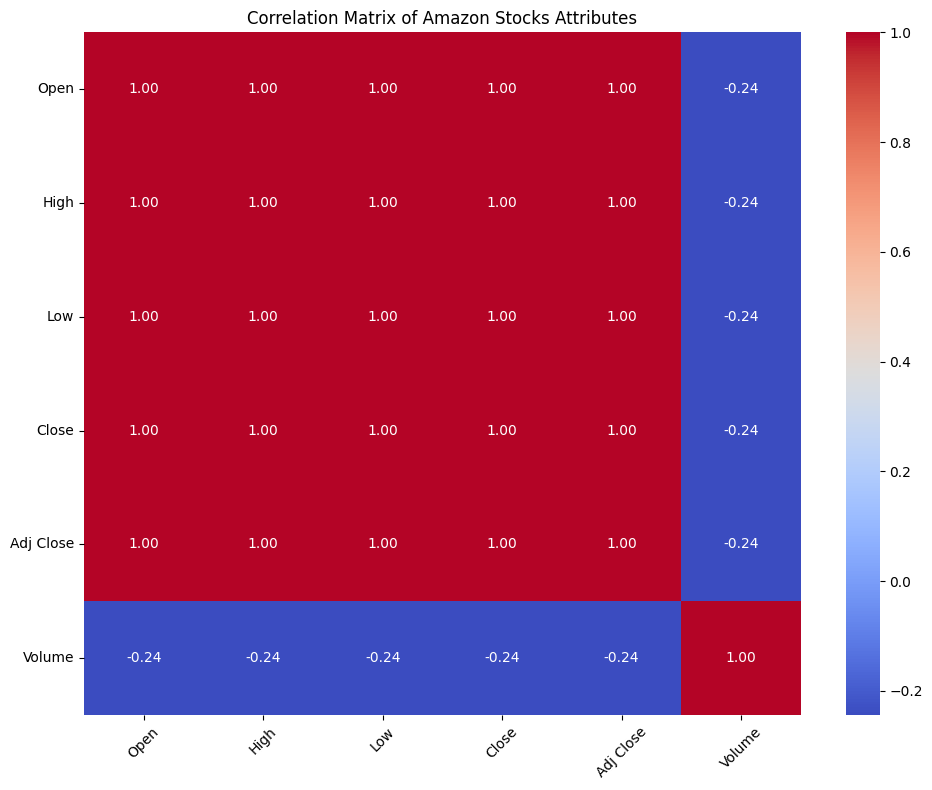

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = '/kaggle/input/amazon-ddddd/AMZN.csv'
amazon_stocks = pd.read_csv(url)
numeric_cols = amazon_stocks.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Amazon Stocks Attributes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = scaled_data[:, :5]  
y = np.where(scaled_data[:, 5] > np.mean(scaled_data[:, 5]), 1, 0)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("\nKNN Classification Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



KNN Classification Results:
Accuracy: 0.794351279788173
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       778
           1       0.70      0.60      0.65       355

    accuracy                           0.79      1133
   macro avg       0.76      0.74      0.75      1133
weighted avg       0.79      0.79      0.79      1133

